# Floats (and the limits of representation)

In [1]:

# Consider the following trivial math example

a = 1.1
b = 2.2

print(type(a))
print(type(b))

<class 'float'>
<class 'float'>


## What results you would expect from 
```python

c = a + b
print(c)

```

In [2]:
c = a + b
print(c)

3.3000000000000003


In [3]:

# Weird = lets try the other way around

a = 1.1
b = 2.2

d = a + b +b +b + a + 1.2
print(d)
type(d)

10.0


float

In [4]:
d - 1.1 - 3.3

5.6000000000000005

In [5]:
# More surprising results

result = 0.1 + 0.1 + 0.1 - 0.3
print(result)

5.551115123125783e-17


## There is another way floating points making computing hard to reason about

![whale](./img/whale.jpg)

In [7]:
# Consider the following example
smallish = 0.000000000000000000000000000000000000000000000000007
bigish = 1.00000000000000000000000000000000000000000000000000001


In [8]:
res = smallish+bigish
print(res)
print(res == bigish)
# What happened here?

1.0
True


## Why does this happen? 

* **Our arithematic is based on base 10**

![hands](./img/hands.webp)

<pre>
17 = 1 * 10 ^1 + 7 * 10 ^ 0
0.1 = 1 * 10 ^ -1
</pre>
* Computer arithematic is based on binary base

<pre>
001 = 0 + 0 + 1 * 2 ^ 0
010 = 0 + 1 * 2 ^ 1 + 0
</pre>

* But how do we represent in binary base the decimal number: 0.1 ?

* Turns out it the binary equivalent of trying to represent 1/3 in the decimal base. 

## Decimal to the rescue

Self described:
>Decimal “is based on a floating-point model which was designed with people in mind, and necessarily has a paramount guiding principle – computers must provide an arithmetic that works in the same way as the arithmetic that people learn at school.”

Other languages have similiar "bigint" modules

In [10]:
from decimal import Decimal

a = Decimal('1.1')
b = Decimal('2.2')

c= a +b 
type(c)

decimal.Decimal

In [14]:
float(c) - 1.1

2.1999999999999997

In [15]:
# We can also make decimals out of floats (imagine we're parding an xlsx file)

a = Decimal(1.13336)
print(a)

1.1333599999999999230482217171811498701572418212890625


In [17]:
# But to get something meaningful we need to control the number of places after the point

a.quantize(Decimal('0.0001'))

1

In [21]:
# What happens when we need to control the rounding?

from decimal import getcontext, ROUND_UP, ROUND_DOWN
getcontext().rounding = ROUND_DOWN

print(a.quantize(Decimal('0.0001')))

1.1333


### Basically wherever you're handling Money you should be using decimal (or bigint equivalent in other programming languages)

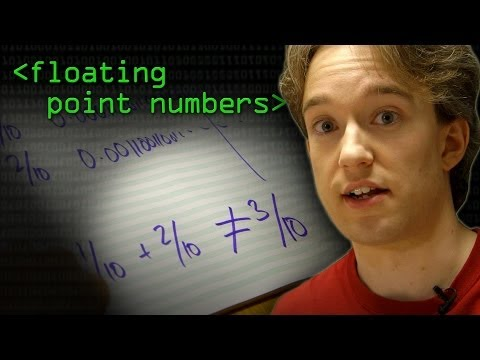

In [1]:
from IPython.lib.display import YouTubeVideo

YouTubeVideo('PZRI1IfStY0')

# Read more:
* [the decimal module](https://docs.python.org/3/library/decimal.html)
* [the fractions module](https://docs.python.org/3/library/fractions.html)
* [Floating point tutorial](https://docs.python.org/3/tutorial/floatingpoint.html)